__importing the libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.figure_factory as ff
%matplotlib inline

Checking the version for all libries

In [2]:
np.__version__

'1.16.4'

In [3]:
sns.__version__

'0.10.0'

In [4]:
pd.__version__

'0.25.0'

In [5]:
plotly.__version__

'4.7.1'

Loading the dataset

In [6]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# (no. of rows, no. of columns)

In [7]:
df.shape

(200, 5)

__Checking for missing value__

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.shape

(200, 5)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


__finding any null values in data__

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

__Finding the number of males and females in the data__

In [12]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

__Visualising the number of males and females in the data__

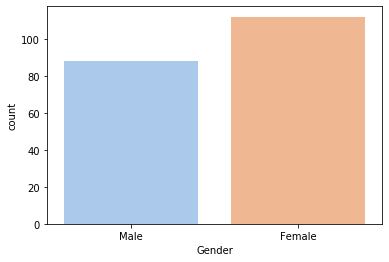

In [13]:
sns.countplot(x="Gender",data=df,palette="pastel")
plt.show()

The number of females customers is more than the number of male customers

 __Computing minimum and maximum age of customers__

In [14]:
print(min(df.Age))
print(max(df.Age))

18
70


__Visualising the age distribution of customers__

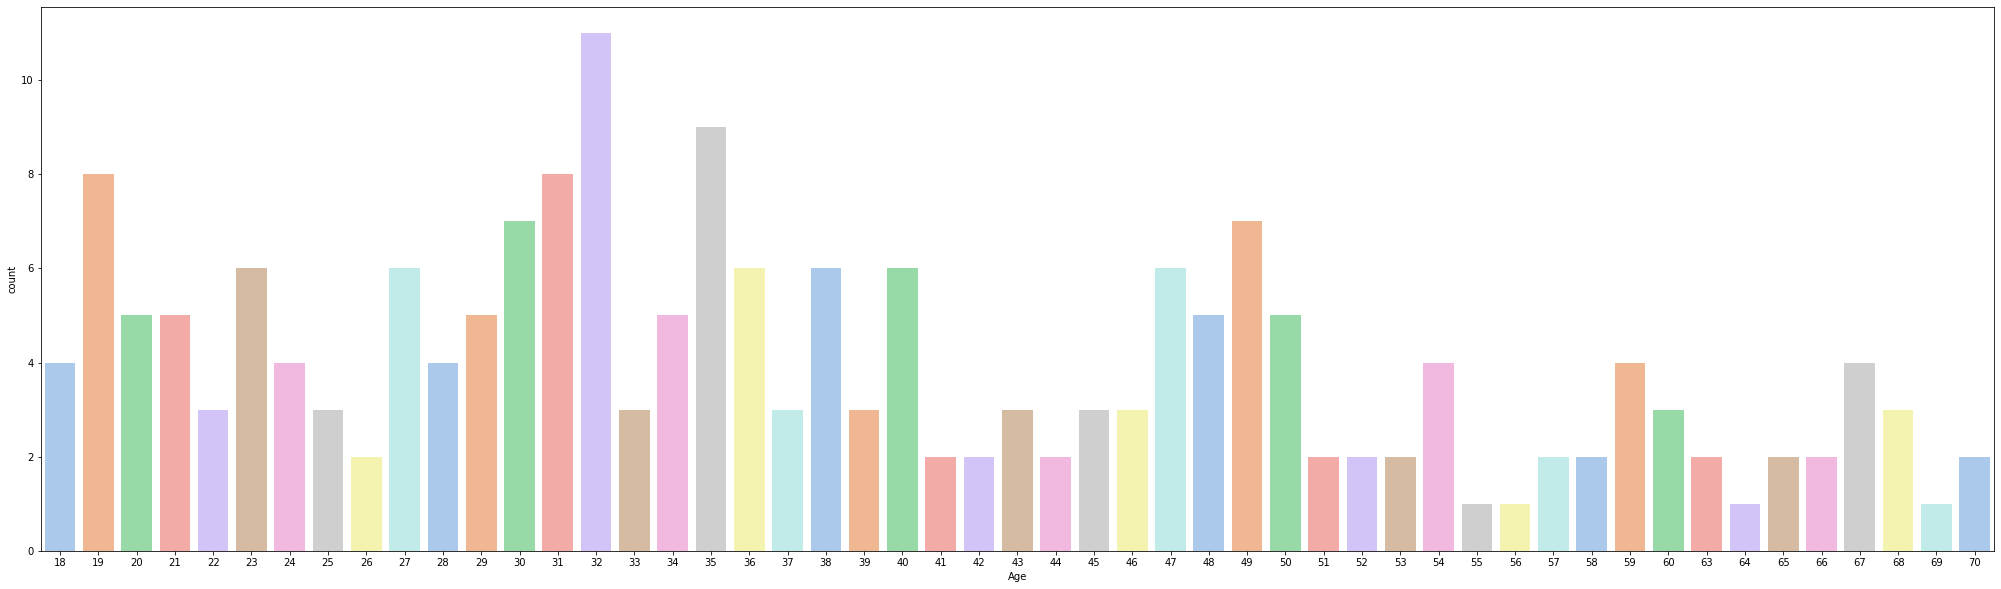

In [15]:
plt.figure(figsize=(35,10))
sns.countplot(x="Age",data=df,palette="pastel")
plt.show()

Customers with age 32 make for the largest number of customers.

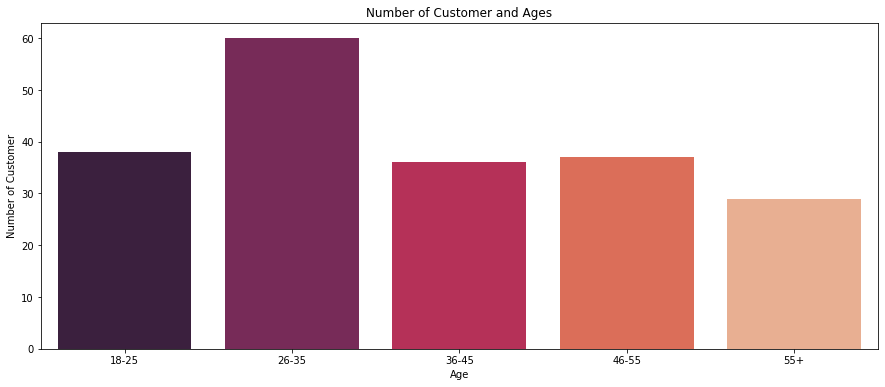

In [16]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

 The 26–35 age group outweighs every other age group.

Next the box plot of spending score and annual income to better visualize the distribution range. 

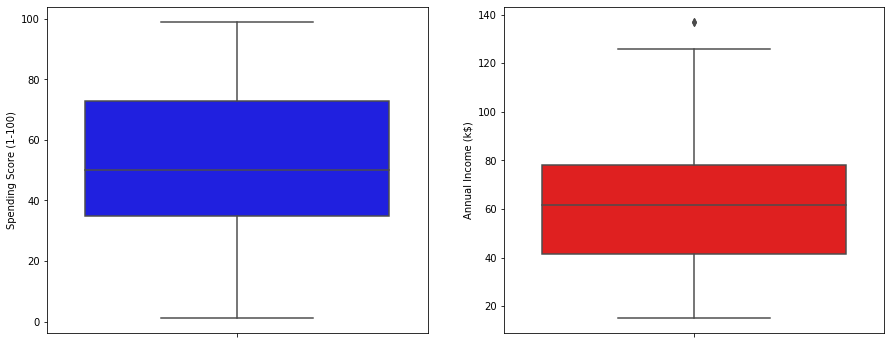

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="blue")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"],color="red")
plt.show()

The range of spending score is clearly more than the annual income range.

__Visualising the income distribution of customers__

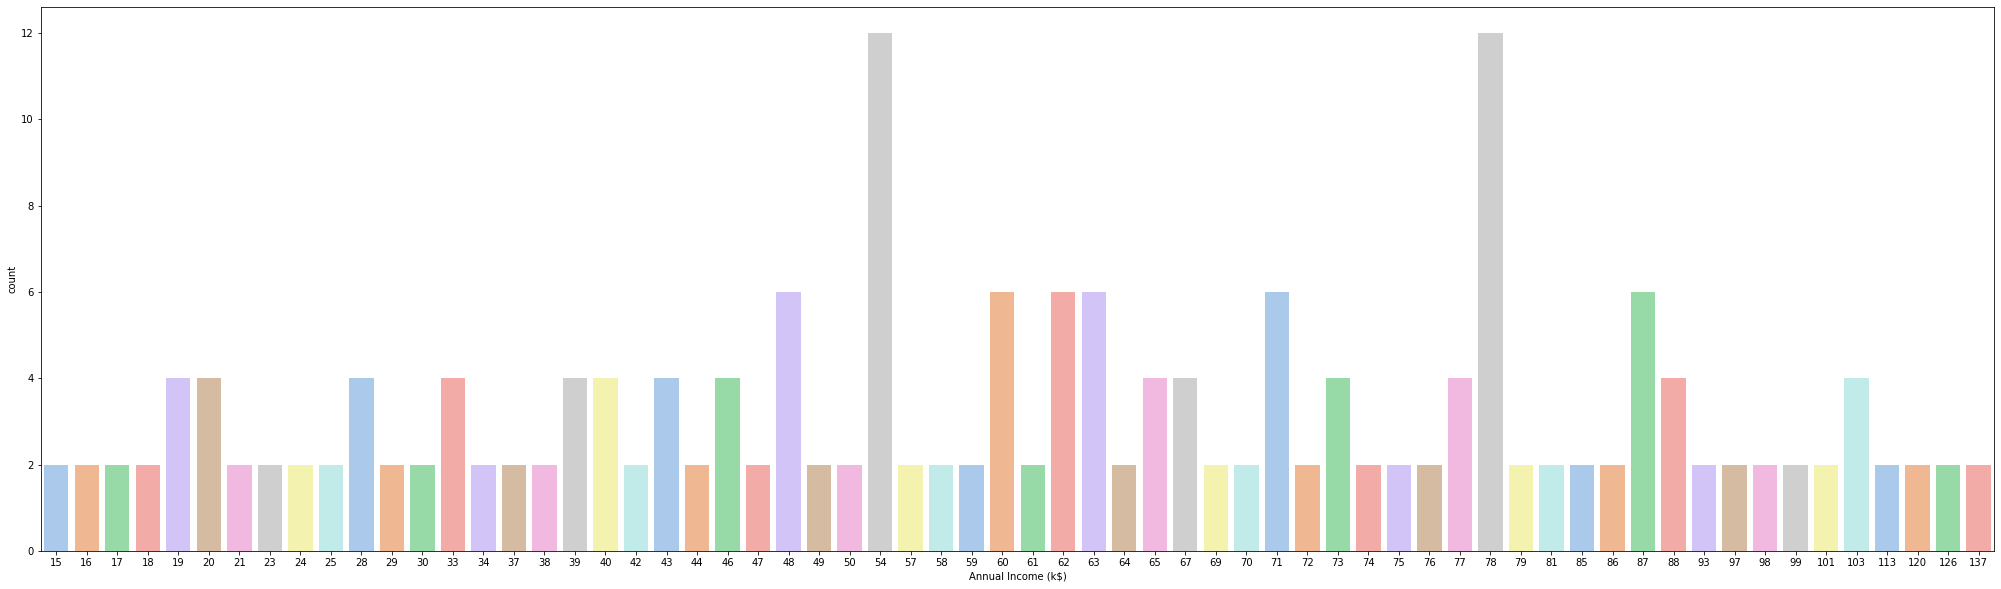

In [18]:
plt.figure(figsize=(35,10))
sns.countplot(x="Annual Income (k$)",data=df,palette="pastel")
plt.show()

Customers with annual income of 54k and 78k make for the largest number of customers.

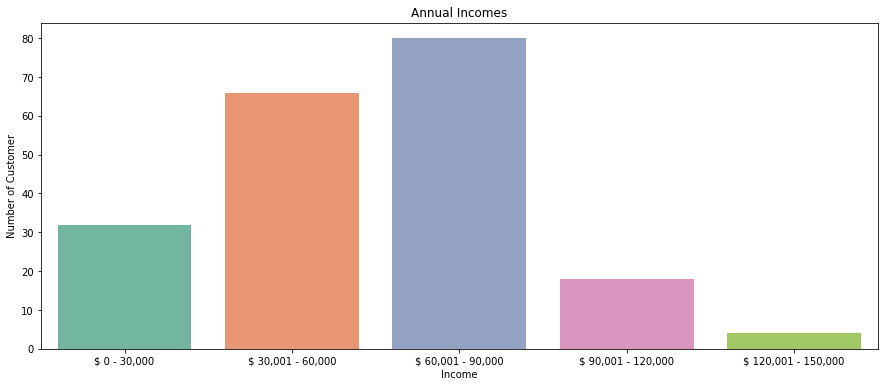

In [19]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

 The majority of the customers have annual income in the range 60000 and 90000.

__Visualising the spending score of customers__

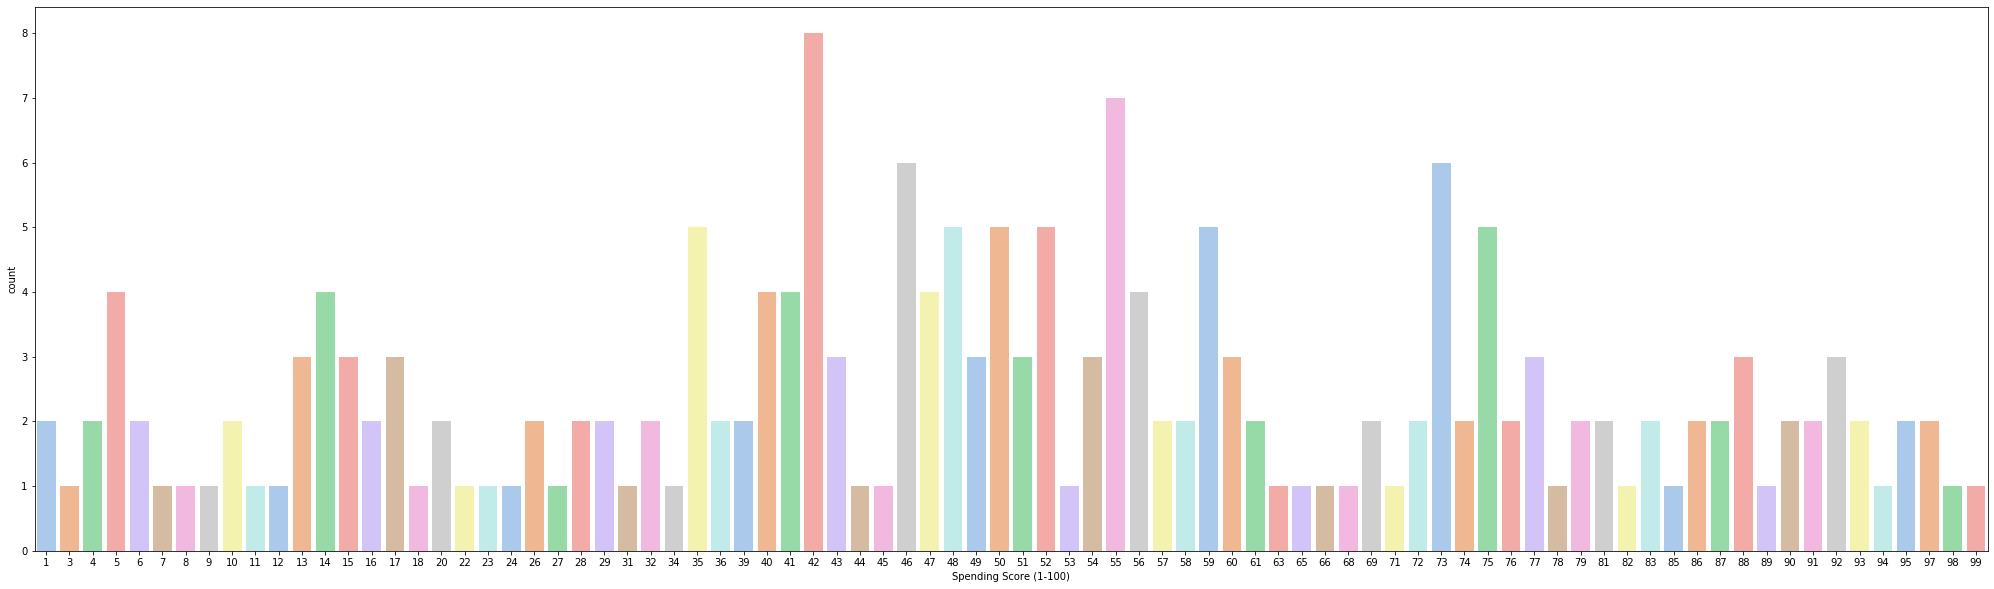

In [20]:
plt.figure(figsize=(35,10))
sns.countplot(x="Spending Score (1-100)",data=df,palette="pastel")
plt.show()

The maximum spending score is 42.

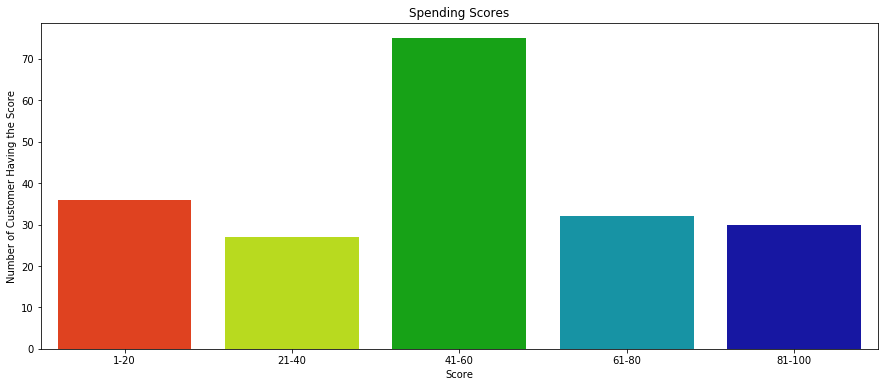

In [21]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

The majority of the customers have spending score in the range 41–60.

__Finding correaltion between all the parameters in the dataset.__

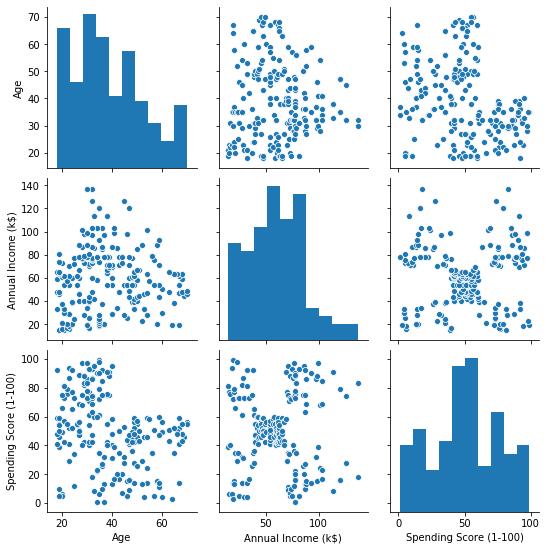

In [22]:
sns.pairplot(df.iloc[:,1:6])

There can be some conslusions from the data:-

In our data, we can observe that middle-aged people earn the most and young to middle-aged people spend the most. Thus they are a good target to focus new products and advertisement.

Spending and earning are more or less uniform for both the genders, so gender neutral products will probably have a good market.

Spending Score and Annual income has clear clusters, thus they are good features which can be considered for clustering the customers




__Heatmap of the Dataset__

It can help us understand the correlations of the columns better


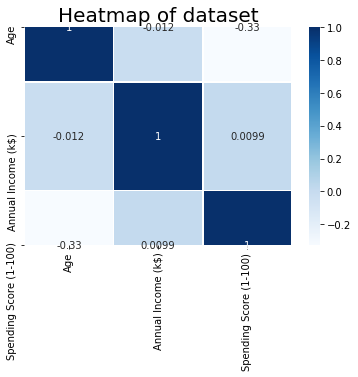

In [23]:
hm=sns.heatmap(df.iloc[:,1:5].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm


__Making clusters based on Annual income and Spending Score.__

Taking annual income and spending score in x to make clusters

In [24]:
x=df.iloc[:,[3,4]]

dispalying first 5 rows of x

In [25]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


__import K-Means from the sklearn library.__

In [26]:
from sklearn.cluster import KMeans

Using elbow method to find the optimal number of clusters.

In [27]:
wcss=[]
for i in range (1,15):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=500,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Visualising elbow method

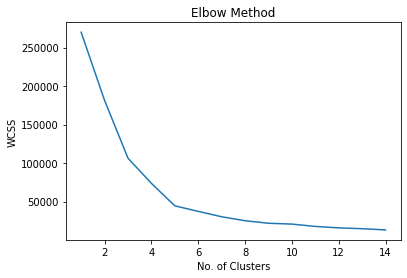

In [28]:
plt.plot(range(1,15),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

So the optimal number of clusters = 5

Applying K-Means:

Creating object kmeans of class KMeans()

In [29]:
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)

it tells which data point belongs to which cluster (0,1,2,3,4)

In [30]:
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [31]:
len(y_kmeans)

200

__converting x into ndarray to avoid errors__

In [32]:
x=np.array(x)

Visualising the cluster :

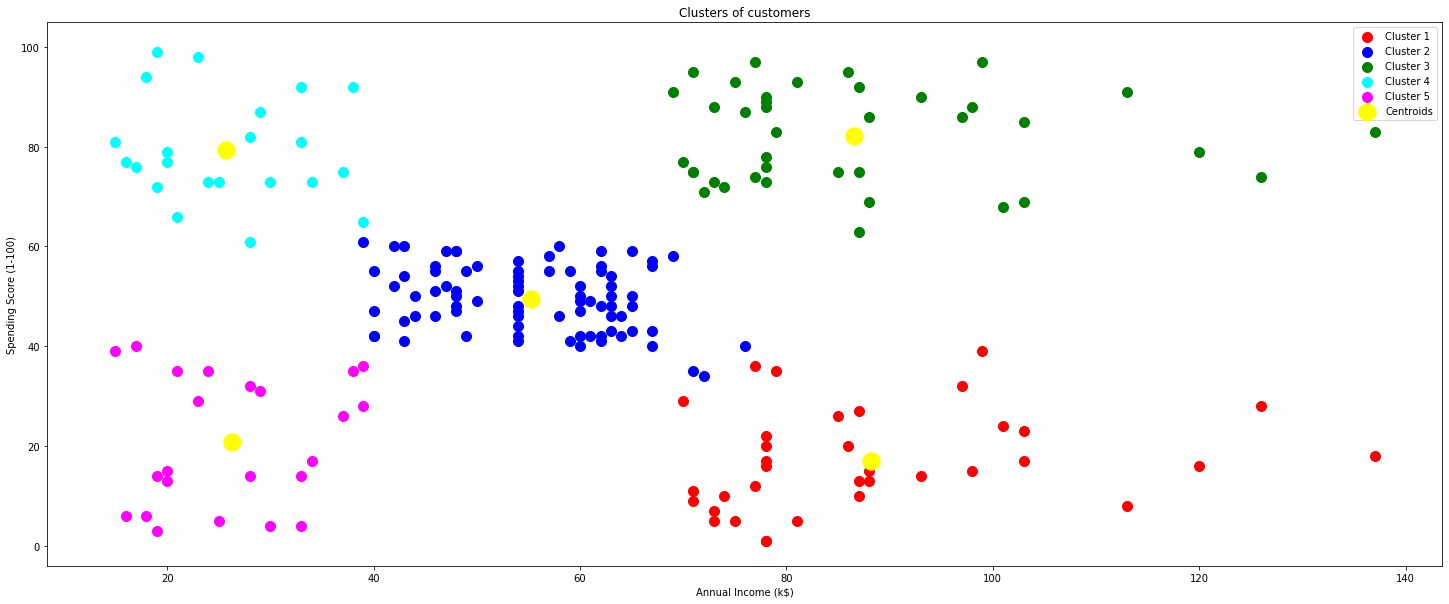

In [33]:
fig = plt.figure(figsize=(25, 10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cluster 1 (Red Color) ->  Earning High but spending very less

cluster 2 (Bleu Color) -> Earning medium but spending medium

cluster 3 (green Color) -> Earning is high & spending is more(Mall can target this type of people)

cluster 4 (cyan Color) -> Earning is less but spending more(Mall can target this type of people) 

Cluster 5 (magenta Color) -> Earning less & spending less 

yellow  small circles is our Centroids

We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these are easy to converse 

wherein others we can set like once in a week or once in a month


Now we make a cluster once again with perfect labels

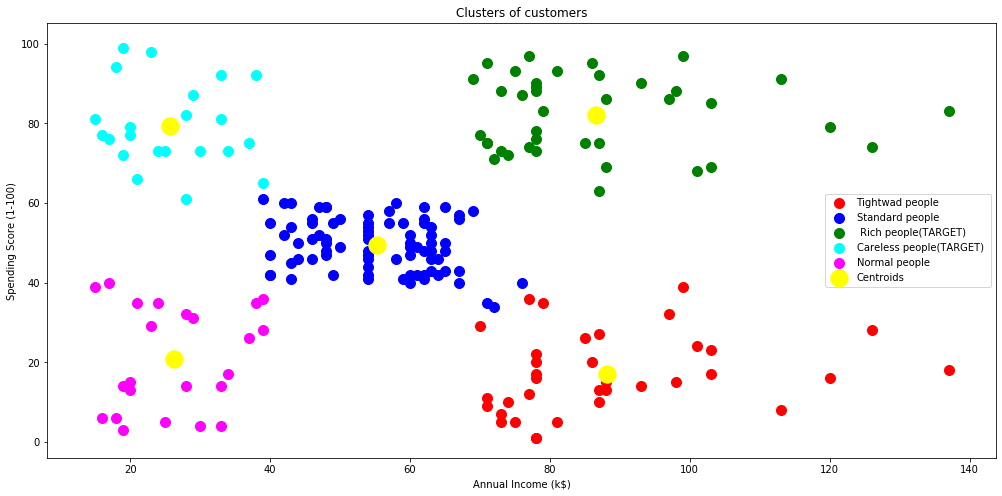

In [34]:
plt.figure(1 , figsize = (17 , 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Tightwad people')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard people')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = ' Rich people(TARGET)')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless people(TARGET) ')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Normal people')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

__Segment 2 :Making clusters based on Annual income and Spending Score.__

Taking age and spending score in x to make clusters

In [35]:
y=df.iloc[:,[2,4]]

In [36]:
y.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [37]:
wcss1=[]
for j in range (1,15):
    kmeans1=KMeans(n_clusters=j,init="k-means++",max_iter=500,n_init=10,random_state=0)
    kmeans1.fit(y)
    wcss1.append(kmeans1.inertia_)

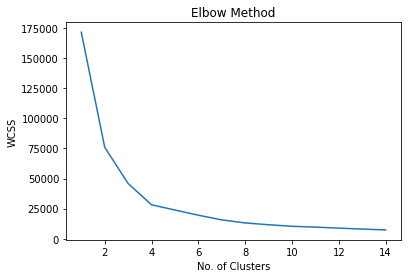

In [38]:
plt.plot(range(1,15),wcss1)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

So the optimal number of clusters = 4

Applying K-Means:

Creating object kmeans of class KMeans()

In [39]:
kmeans1=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)

In [40]:
y_kmeans1=kmeans1.fit_predict(y)
y_kmeans1

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [41]:
len(y_kmeans1)

200

In [42]:
y=np.array(y)

Visualising the cluster :

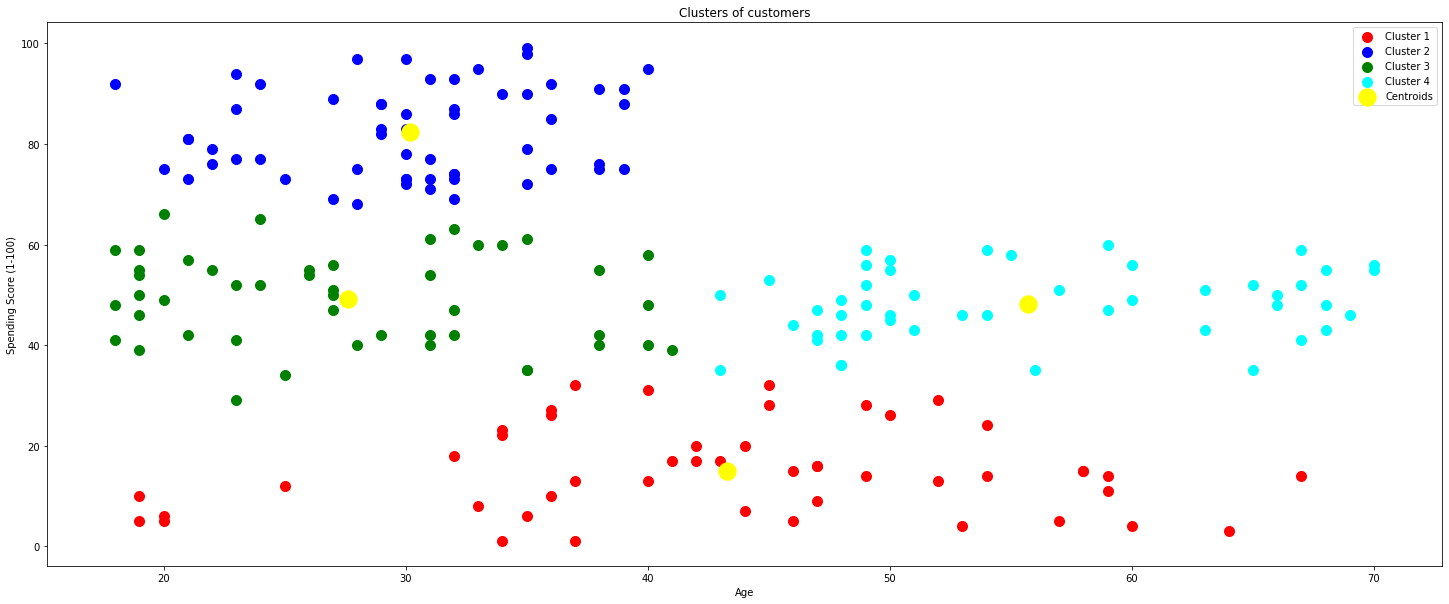

In [43]:
fig = plt.figure(figsize=(25, 10))
plt.scatter(y[y_kmeans1 == 0, 0], y[y_kmeans1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(y[y_kmeans1 == 1, 0], y[y_kmeans1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(y[y_kmeans1 == 2, 0], y[y_kmeans1 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(y[y_kmeans1 == 3, 0], y[y_kmeans1 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cluster 1 (Red Color) -> Age(36-45) but spending very less

cluster 2 (Bleu Color) -> Age(26-35) very high&spending high(Mall can target this type of people)

cluster 3 (green Color) -> Age(18-25)high but spending is medium

cluster 4 (cyan Color) -> Age(50+)less but spending medium

yellow small circles is our Centroids

We can put Cluster 2 into some alerting system where email can be send to them on daily basis as these are easy to converse

wherein others we can set like once in a week or once in a month


Now we make a cluster once again with perfect labels

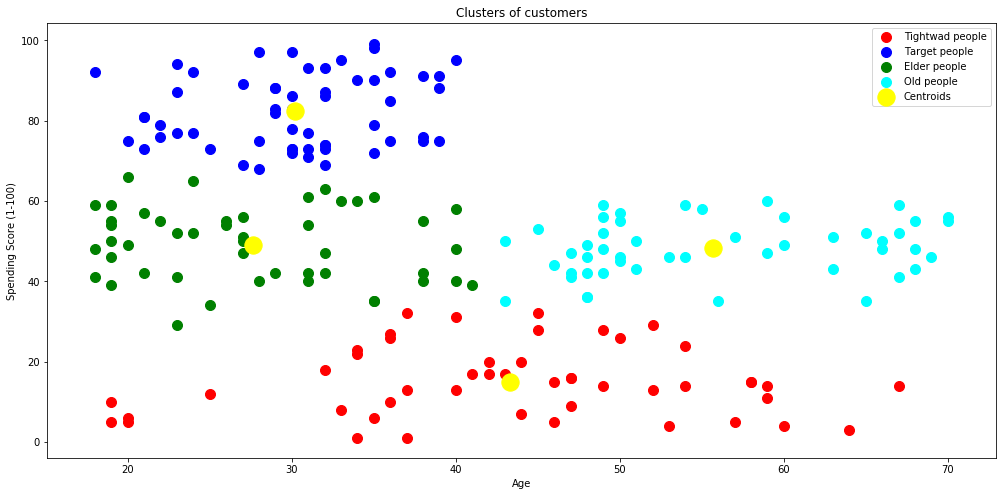

In [44]:
plt.figure(1 , figsize = (17 , 8))
plt.scatter(y[y_kmeans1 == 0, 0], y[y_kmeans1 == 0, 1], s = 100, c = 'red', label = 'Tightwad people')
plt.scatter(y[y_kmeans1 == 1, 0], y[y_kmeans1 == 1, 1], s = 100, c = 'blue', label = 'Target people')
plt.scatter(y[y_kmeans1 == 2, 0], y[y_kmeans1 == 2, 1], s = 100, c = 'green', label = 'Elder people')
plt.scatter(y[y_kmeans1 == 3, 0], y[y_kmeans1 == 3, 1], s = 100, c = 'cyan', label = 'Old people')
#plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Normal people')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()